# Описание

Посмотрим на данные. Возможно, выделим какие-то функции для препроцессинга.

# Импорты

In [118]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import normaltest, moment, ks_2samp

# Загрузка данных

In [4]:
DATA_PATH = '../data'

In [10]:
TRAIN_FILE = 'TRAIN_DATA.csv'
TEST_FILE = 'TEST_DATA.csv'

In [11]:
train_data = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILE))
test_data = pd.read_csv(os.path.join(DATA_PATH, TEST_FILE))

In [12]:
train_data.head()

,row_id,target,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,2,10024.24,A,D,A,A,A,0.69840,A,A,...,A,L,A,BI,A,0.464228,T,A,A,B
1,3,5887.65,A,A,A,A,A,0.24564,A,A,...,A,K,A,BI,A,0.330514,P,A,A,A
2,4,21015.57,A,D,A,A,A,0.28768,A,A,...,A,G,A,BI,A,0.400280,T,A,A,A
3,6,6251.75,A,D,A,A,A,0.34987,A,A,...,A,A,A,BI,A,0.438385,T,A,A,A
4,7,1899.61,A,D,A,A,B,0.49462,A,A,...,A,I,A,BI,A,0.485918,T,A,A,B


In [13]:
test_data.head()

,row_id,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,0,A,D,I,A,A,0.36083,A,B,A,...,A,B,A,BI,B,0.298041,T,A,A,B
1,1,A,E,E,A,A,0.52450,A,A,A,...,B,H,A,BI,B,0.662480,R,A,A,B
2,5,A,A,E,A,A,0.49462,A,A,A,...,A,O,A,AB,A,0.677861,P,A,A,D
3,13,A,D,A,A,A,0.82252,A,A,A,...,A,L,A,BI,A,0.586522,T,A,A,B
4,14,A,A,A,A,A,0.64027,A,A,A,...,A,I,A,AB,A,0.284869,P,A,A,B


# Изучение данных

### Таргет

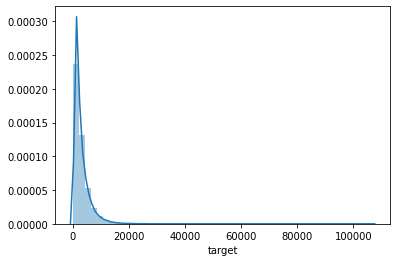

In [29]:
sns.distplot(train_data['target'])

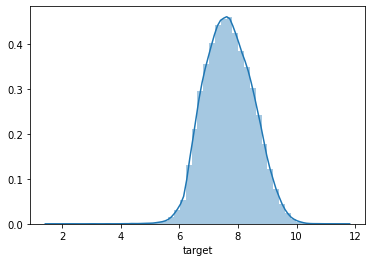

In [30]:
sns.distplot(np.log(train_data['target']))

In [32]:
normaltest(np.log(train_data['target']))

NormaltestResult(statistic=338.34649207109726, pvalue=3.3805920132635186e-74)

Жаль, но это всё же не логнормальное распределение.

In [37]:
for m in [1, 2, 3, 4]:
    print(f"{m}-ый момент составляет {moment(np.log(train_data['target']), moment=m):.3f}")

1-ый момент составляет 0.000
2-ый момент составляет 0.658
3-ый момент составляет 0.050
4-ый момент составляет 1.240


То есть всё дело в несимметричности.

## Признаки

In [43]:
for i in range(130):
    col = f"feat_{i}"
    print(col, train_data[col].dtype)

feat_0 object
feat_1 object
feat_2 object
feat_3 object
feat_4 object
feat_5 float64
feat_6 object
feat_7 object
feat_8 object
feat_9 float64
feat_10 object
feat_11 object
feat_12 float64
feat_13 object
feat_14 object
feat_15 object
feat_16 object
feat_17 object
feat_18 object
feat_19 object
feat_20 object
feat_21 object
feat_22 float64
feat_23 object
feat_24 object
feat_25 float64
feat_26 object
feat_27 object
feat_28 object
feat_29 object
feat_30 object
feat_31 object
feat_32 object
feat_33 object
feat_34 object
feat_35 object
feat_36 object
feat_37 float64
feat_38 object
feat_39 object
feat_40 object
feat_41 object
feat_42 object
feat_43 object
feat_44 object
feat_45 object
feat_46 object
feat_47 object
feat_48 object
feat_49 object
feat_50 object
feat_51 object
feat_52 object
feat_53 object
feat_54 object
feat_55 float64
feat_56 float64
feat_57 object
feat_58 object
feat_59 float64
feat_60 float64
feat_61 object
feat_62 object
feat_63 object
feat_64 object
feat_65 object
feat_66 ob

In [47]:
numeric_features = []
for i in range(130):
    col = f"feat_{i}"
    if train_data[col].dtype == np.float64:
        numeric_features.append(col)

In [48]:
numeric_features

['feat_5',
 'feat_9',
 'feat_12',
 'feat_22',
 'feat_25',
 'feat_37',
 'feat_55',
 'feat_56',
 'feat_59',
 'feat_60',
 'feat_86',
 'feat_95',
 'feat_119',
 'feat_125']

In [60]:
len(numeric_features)

14

In [55]:
cat_features = []
for i in range(130):
    col = f"feat_{i}"
    if train_data[col].dtype == object:
        cat_features.append(col)

In [54]:
type(train_data["feat_10"].dtype)

numpy.dtype

In [56]:
len(cat_features) + len(numeric_features)

130

### Числовые признаки

In [70]:
for col in numeric_features:
    print(col, min(train_data[col]), min(test_data[col]))

feat_5 0.23688 0.23688
feat_9 0.000228 0.000228
feat_12 0.0 0.0
feat_22 0.176921 0.176921
feat_25 0.012683 0.012683
feat_37 0.002634 0.002634
feat_55 0.069503 0.069503
feat_56 0.179722 0.18045
feat_59 0.035321 0.035321
feat_60 0.281143 0.281143
feat_86 0.001503 0.001149
feat_95 8e-05 8e-05
feat_119 0.036232 0.036232
feat_125 1.6e-05 1.6e-05


In [71]:
EPS = 0.001

In [79]:
ks_2samp([0, 1, 1, 1, 1], [0, 0, 9]).pvalue

0.6785714285714286

In [80]:
def show_dist(col, ax):
    log_train = train_data[col].apply(lambda x: np.log(x + EPS))
    log_test = test_data[col].apply(lambda x: np.log(x + EPS))
    p_value = ks_2samp(log_train, log_test).pvalue
    ax.set_title(f'{col} distribution, p_value={p_value:.3f}')
    sns.distplot(log_train,
                 ax=ax,
                 label='train')
    sns.distplot(log_test,
                 ax=ax,
                 label='test')
    ax.legend()

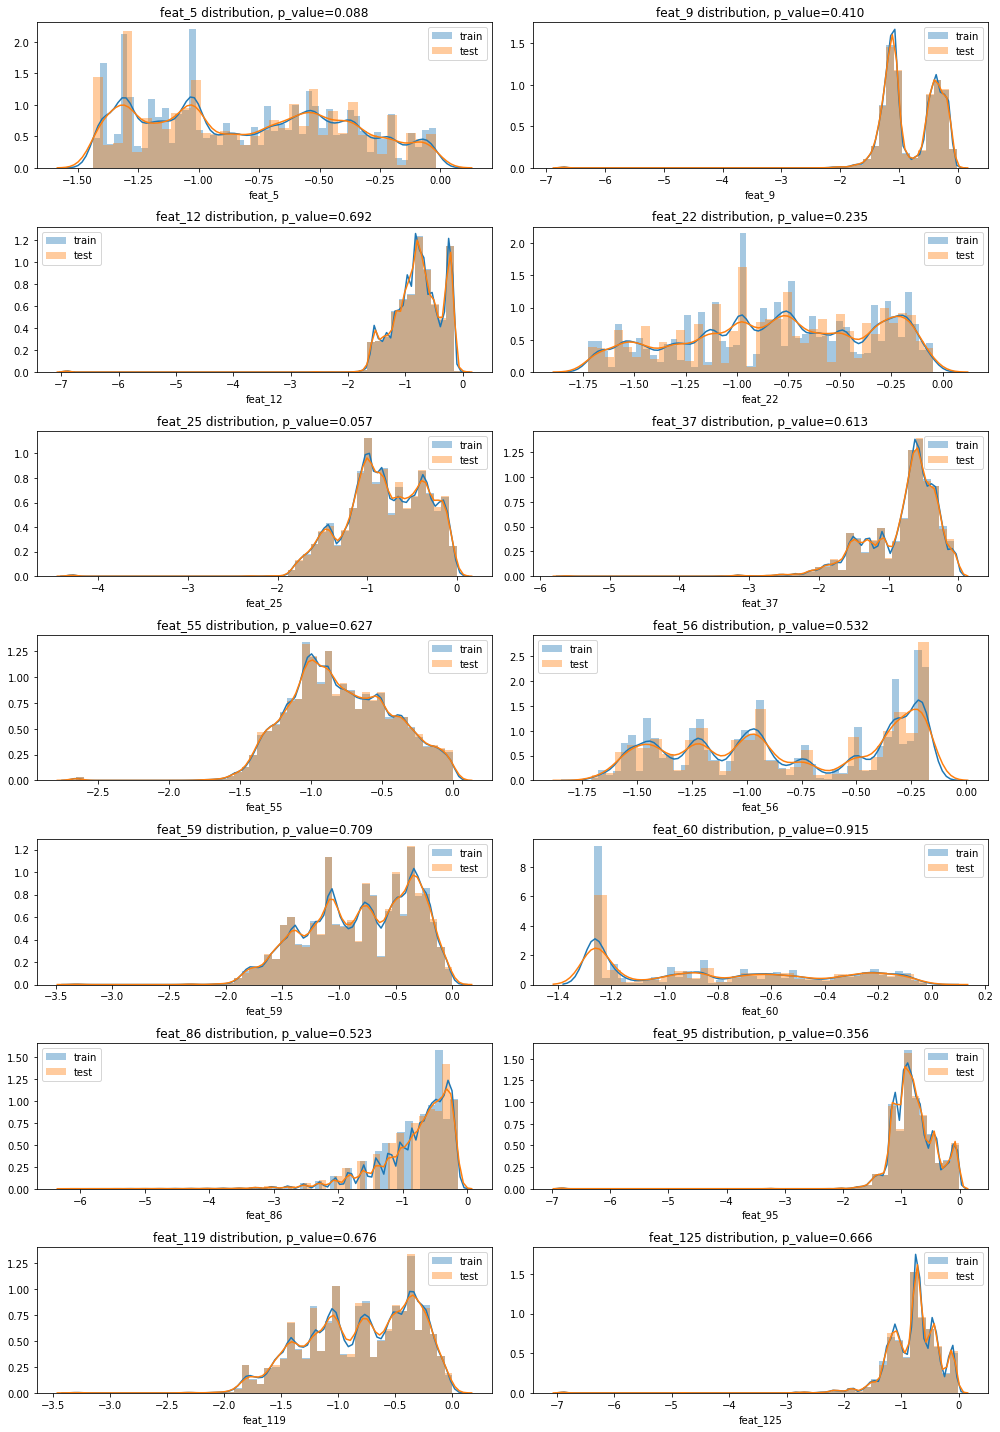

In [81]:
fig, axes = plt.subplots(7, 2, figsize=(14, 20))

for col, ax in zip(numeric_features, axes.reshape(-1)):
    show_dist(col, ax)
    
fig.tight_layout()

Итак, мы убедились, что распределения в обучающей и тестовой выборке для отдельных числовых переменных совпадают.

### Категориальные признаки

In [98]:
cat_features_uniq_counts = train_data[cat_features].apply(lambda x: len(x.unique()))

In [120]:
cat_features_uniq_counts.value_counts()

2      72
4      12
3       4
7       4
19      4
5       3
8       3
17      2
16      2
11      1
9       1
125     1
13      1
82      1
22      1
51      1
310     1
61      1
15      1
dtype: int64


Итак, у нас больше половины "категориальных" признаков -- на самом деле бинарные. Учтём это.

In [96]:
bin_features = cat_features_uniq_counts[cat_features_uniq_counts==2].index.to_list()

In [108]:
bin_features

['feat_0',
 'feat_3',
 'feat_6',
 'feat_7',
 'feat_8',
 'feat_10',
 'feat_13',
 'feat_14',
 'feat_16',
 'feat_17',
 'feat_18',
 'feat_19',
 'feat_21',
 'feat_23',
 'feat_24',
 'feat_26',
 'feat_28',
 'feat_29',
 'feat_31',
 'feat_32',
 'feat_33',
 'feat_34',
 'feat_35',
 'feat_36',
 'feat_40',
 'feat_41',
 'feat_42',
 'feat_44',
 'feat_45',
 'feat_46',
 'feat_47',
 'feat_49',
 'feat_51',
 'feat_52',
 'feat_63',
 'feat_64',
 'feat_65',
 'feat_68',
 'feat_70',
 'feat_71',
 'feat_74',
 'feat_75',
 'feat_76',
 'feat_79',
 'feat_80',
 'feat_82',
 'feat_83',
 'feat_84',
 'feat_85',
 'feat_87',
 'feat_90',
 'feat_91',
 'feat_93',
 'feat_94',
 'feat_97',
 'feat_99',
 'feat_100',
 'feat_101',
 'feat_102',
 'feat_105',
 'feat_107',
 'feat_108',
 'feat_109',
 'feat_110',
 'feat_111',
 'feat_116',
 'feat_117',
 'feat_118',
 'feat_120',
 'feat_122',
 'feat_124',
 'feat_127']

Проверим, что в test не больше значений.

In [104]:
for col in bin_features:
    print(test_data[col].unique(), train_data[col].unique())

['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['B' 'A'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['B' 'A']
['A' 'B'] ['B' 'A']
['B' 'A'] ['B' 'A']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['B' 'A']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['B' 'A']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['B' 'A'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['B' 'A']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['B' 'A'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']
['B' 'A'] ['A' 'B']
['A' 'B'] ['A' 'B']
['A' 'B'] ['A' 'B']


In [105]:
cat_features = cat_features_uniq_counts[cat_features_uniq_counts>2].index.to_list()

In [106]:
len(cat_features)

44

In [119]:
cat_features

['feat_1',
 'feat_2',
 'feat_4',
 'feat_11',
 'feat_15',
 'feat_20',
 'feat_27',
 'feat_30',
 'feat_38',
 'feat_39',
 'feat_43',
 'feat_48',
 'feat_50',
 'feat_53',
 'feat_54',
 'feat_57',
 'feat_58',
 'feat_61',
 'feat_62',
 'feat_66',
 'feat_67',
 'feat_69',
 'feat_72',
 'feat_73',
 'feat_77',
 'feat_78',
 'feat_81',
 'feat_88',
 'feat_89',
 'feat_92',
 'feat_96',
 'feat_98',
 'feat_103',
 'feat_104',
 'feat_106',
 'feat_112',
 'feat_113',
 'feat_114',
 'feat_115',
 'feat_121',
 'feat_123',
 'feat_126',
 'feat_128',
 'feat_129']


Посмотрим отдельно на особо "пышные" категории.

In [109]:
cat_features_uniq_counts[cat_features_uniq_counts > 50]

feat_38     310
feat_67      51
feat_92      61
feat_106    125
feat_123     82
dtype: int64

In [111]:
train_data['feat_38'].value_counts()

HK    15894
DJ    15423
CK     7788
DP     6985
GS     6672
      ...  
BC        1
G         1
FN        1
BM        1
JD        1
Name: feat_38, Length: 310, dtype: int64

In [112]:
test_data['feat_38'].value_counts()

HK    4055
DJ    3775
CK    1868
DP    1761
GS    1640
      ... 
BL       1
JG       1
CX       1
FW       1
R        1
Name: feat_38, Length: 258, dtype: int64

Мы видим, что некоторые значения встречаются всего по одному разу. Возможно, их стоит убрать.